In [108]:
import numpy as np
import random

# Path taken
path = np.array([[]])

# Knobs to turn :)
rows = 15
cols = 15
mol_len = 5
position = np.array([int(rows/2), int(cols/2)])
path = np.append(path, pos)
moves = np.array([[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,1],[1,-1],[-1,-1]])
# Creating array
array1 = np.zeros((rows,cols))
array1[pos[0],pos[1]] = 1

In [109]:
# Defining check to see if there is already a 'molecule' at that position
def check(move):
    global position
    global path
    temp = position + move
    if temp[0] >= rows or temp[1] >= cols:
        return False
    elif array1[temp[0],temp[1]]  == 0:
        array1[temp[0],temp[1]] = 1
        position += move
        path = np.append(path, position)
        return True
    else:
        return False

In [112]:
# Random walk function
def RandomWalk(length, array):
    i = 0
    while i < length: # Iterate through every atom in the molecule
        move = random.randint(0, 7)
        if move == 0:
            move = moves[0]
        elif move == 1:
            move = moves[1]
        elif move == 2:
            move = moves[2]
        elif move == 3:
            move = moves[3]
        elif move == 4:
            move = moves[4]
        elif move == 5:
            move = moves[5]
        elif move == 6:
            move = moves[6]
        elif move == 7:
            move = moves[7]
        check(move)
        print(move)
        if move:
            continue
        i += 1

In [113]:
RandomWalk(mol_len,array1)
print(array1)

2
1
3
0
7
2
6
2
5
2
3
5
3
7
1
2
1
2
4
4
5
4
7
6
0
3
0
2
5
2
3
6
0
0
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


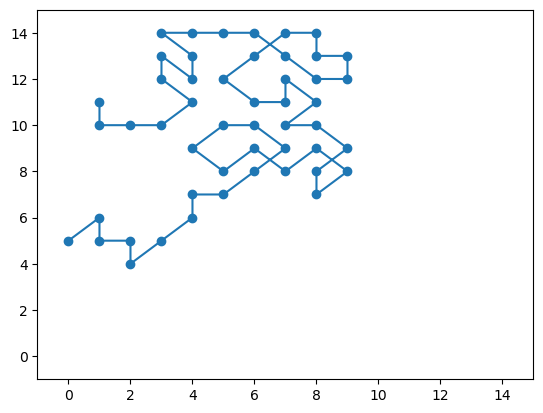

Time: 0.0725393295288086 s
50 atoms


In [10]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time

start_time = time.time() # Starting a timer

# Knobs to turn :)
mol_len = 50 # Length of the molecule chain
rows = 15 # Number of rows in array
cols = 15 # Number of columns in the array
moves = np.array([[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,1],[1,-1],[-1,-1]]) # Possible moves
max_packing_density = 0.74
max_packing_density = 0.01

position = np.array([random.randint(0, rows - 1), random.randint(0, cols - 1)])
path = [position.tolist()]  # Final output of coordinates

# Creating array
array1 = np.zeros((rows,cols))
array1[position[0],position[1]] = 1

# Defining check to see if there is already a 'molecule' at that position
def check(move):
    global position
    global path
    temp = position + move
    if temp[0] >= rows or temp[1] >= cols or temp[0] < 0 or temp[1] < 0:
        return False
    elif array1[temp[0],temp[1]]  == 0: # Checking to see if the move has already been made
        position = temp
        array1[position[0], position[1]] = 1
        path.append(position.tolist()) # Adding move to the path array
        return True
    else:
        return False

# Random walk function
def RandomWalk(length, array):
    i = 0
    j = 0

    while i < (length - 1): # Iterate through every atom in the molecule
        move = moves[random.randint(0, 7)]
        if j >= mol_len * 2:
            i = 0
            j = 0
            position = np.array([random.randint(0, rows - 1), random.randint(0, cols - 1)])
            path = [position.tolist()]
            array1 = np.zeros((rows,cols)) # Resetting array
            break
        if not check(move):
            j += 1
            continue           
        i += 1

RandomWalk(mol_len, array1)

#Plotting the path
path = np.array(path)
plt.plot(path[:, 1], path[:, 0], marker='o')
plt.xlim([-1, cols])
plt.ylim([-1, rows])
plt.show()
print("Time:", time.time() - start_time, "s")
print(path.shape[0], "atoms")

In [524]:
density = (mol_len / (rows * cols))
print(density)
def dens_check(dens):
    if dens >= max_packing_density:
        print("Packing density too high")
    elif dens <= min_packing_density:
        print("Packing density too low")

dens_check(density)

def calc_grid_size(density, molecule_len):
    column = np.ceil(np.sqrt(molecule_len / density))

size = calc_grid_size(0.3, 40)

0.2222222222222222
Packing density too high


Time: 0.032378435134887695 s for 2 molecules with 100 atoms


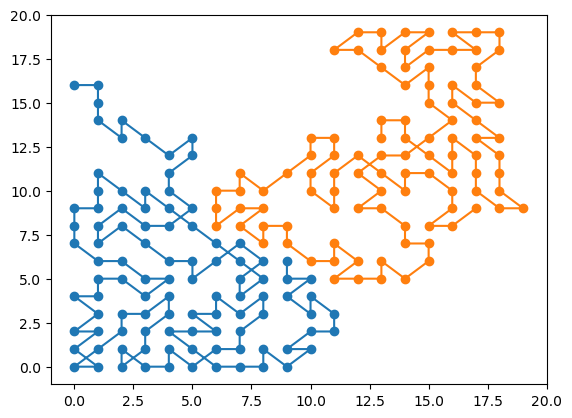

In [19]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time

start_time = time.time() # Starting a timer

# Knobs to turn :)
mol_len = 100 # Length of the molecule chain
rows = 20 # Number of rows in array
cols = 20 # Number of columns in the array
moves = np.array([[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,1],[1,-1],[-1,-1]]) # Possible moves
num_mols = 2
all_paths = []
roll_back = int(np.ceil(mol_len / 1000))

# Creating array
array1 = np.zeros((rows,cols))

# Defining check to see if there is already a 'molecule' at that position
def check(array, move, position):
    global all_paths
    temp = position + move
    temp_tuple = tuple(temp) # Allowing comparison to array position
    if (temp[0] >= rows or temp[1] >= cols or temp[0] < 0 or temp[1] < 0 or 
    temp_tuple in {tuple(pos) for path in all_paths for pos in path}): # Check if move is occupied by previous molecule
        return False, array, position
    elif array[temp[0], temp[1]] == 0: # Check if move is occupied by this molecule
        position = temp
        array[position[0], position[1]] = 1
        return True, array, position
    else:
        return False, array, position

# Roll back function
def rollback(array, path, position):
    """Steps the molecule, path, and position back by a set amount of atoms.""" # Doesn't work at the moment
    global num_roll_back
    for x in range(roll_back):
        array[position[0], position[1]] = 0
        position = path[-(x + 1)]
    path = path[:-roll_back]
    num_roll_back += 1
    return path, position

# Plotting the path
def plot(paths):
    """Graphs the paths of the creation of the molecules."""
    for path in paths:
        path = np.array(path)
        plt.plot(path[:, 1], path[:, 0], marker='o')
    plt.xlim([-1, cols])
    plt.ylim([-1, rows])
    print("Time:", time.time() - start_time, "s for", len(paths), "molecules with", mol_len, "atoms")
    plt.show()

# Random walk function
def RandomWalk(array, length, num_mol):
    """Creates a path taken by a Monte-Carlo simulation to make a chain of atoms."""
    global all_paths
    for path in range(num_mol):
        path = []
        position = np.array([random.randint(0, rows - 1), random.randint(0, cols - 1)])
        array[position[0], position[1]] = 1
        path.append(position.tolist())
        i = 0 # Count of atoms placed
        j = 0 # Count of rejected moves
        while i < (length - 1): # Iterate through every atom in the molecule
            move = moves[random.randint(0, 7)]
            if j >= mol_len * 2: # Check if too many erroneous moves have been made
                # Resetting the array and position
                array.fill(0)
                position = np.array([random.randint(0, rows - 1), random.randint(0, cols - 1)])
                array[position[0], position[1]] = 1
                path = [position.tolist()]
                i = 0
                j = 0
                continue
            success, array, position = check(array, move, position)
            if not success:
                j += 1
                continue           
            path.append(position.tolist())
            i += 1
        all_paths.append(path)
    return all_paths

path = RandomWalk(array1, mol_len, num_mols)
plot(path)